In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

cali = pd.read_csv('california-housing-data.csv')
cali_cleaned = cali[cali.ocean_proximity != 'ISLAND'].dropna()
cali_cleaned['household_average'] = cali_cleaned['population']/cali_cleaned['households']
apartments = cali_cleaned[ (cali_cleaned['household_average'] > 8)].index
cali_cleaned.drop(apartments , inplace=True)
dummies = pd.get_dummies(cali_cleaned.ocean_proximity)
cali_cleaned = cali_cleaned.assign(zmedianincome = lambda x : ((x['median_income']-x['median_income'].mean())/x['median_income'].std()))  # z-score median income
cali_cleaned = cali_cleaned.assign(zhouseage = lambda x : ((x['housing_median_age']-x['housing_median_age'].mean())/x['housing_median_age'].std())) # z-score house age
cali_cleaned = cali_cleaned = cali_cleaned.assign(zhousevalue = lambda x : ((x['median_house_value']-x['median_house_value'].mean())/x['median_house_value'].std())) #z-score house value
dummies = pd.get_dummies(cali_cleaned['ocean_proximity'])
cali_cleaned = pd.merge(cali_cleaned, dummies, left_index=True,
         right_index=True)
cali_cleaned

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,household_average,zmedianincome,zhouseage,zhousevalue,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,2.555556,2.349862,0.983068,2.129426,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,2.109842,2.337305,-0.606250,1.313884,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,2.802260,1.786469,1.857194,1.258416,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,2.547945,0.934733,1.857194,1.164815,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,2.181467,-0.013348,1.857194,1.172615,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,2.560606,-1.219434,-0.288386,-1.116276,0,1,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,3.122807,-0.693661,-0.844648,-1.124943,0,1,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,2.325635,-1.145725,-0.924114,-0.993208,0,1,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,2.123209,-1.057507,-0.844648,-1.059076,0,1,0,0


In [2]:
cali_cleaned.corr()

NameError: name 'cali_cleaned' is not defined

<Axes: xlabel='household_average', ylabel='median_income'>

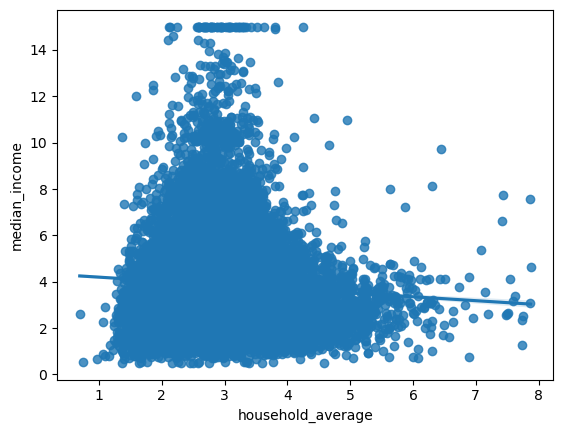

In [2]:
sns.regplot(x="household_average",
                    y="median_income",
                    data=cali_cleaned)

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [10]:
X = cali_cleaned[['household_average']] #setting explanatory variables
Y = cali_cleaned['median_income']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train,Y_train)
training_score = linear.score(X, Y) # calculate rsq for the training set

print("Training score is",np.round(training_score, 3))
print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))


Training score is 0.004
Correlation score is 0.066
Coefficients are [-0.154]
Intercept is 4.32


In [11]:
preds_linear = linear.predict(X_test) 
rsquared_linear = r2_score(Y_test,preds_linear) 
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Training score is 0.004
Testing score is 0.007
